In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [31]:
ODAQ_results = pd.read_csv('./ODAQ/ODAQ_listening_test/ODAQ_results.csv')
ODAQ_results_BSU1 = pd.read_csv('./ODAQ_v1_BSU/Cohort_B1_results.csv')
ODAQ_results_BSU2 = pd.read_csv('./ODAQ_v1_BSU/Cohort_B2_results.csv')

In [32]:
ODAQ_results

,score,method,condition,process,item,subject
0,47.0,LP,LP3.5,LP35,LP_11_guitar,Subject 1: USLA08
1,5.0,LP,LP3.5,LP35,LP_11_guitar,Subject 2: DEID44
2,10.0,LP,LP3.5,LP35,LP_11_guitar,Subject 3: DEID1115
3,20.0,LP,LP3.5,LP35,LP_11_guitar,Subject 4: DEID337
4,30.0,LP,LP3.5,LP35,LP_11_guitar,Subject 5: USLA06
...,...,...,...,...,...,...
6235,100.0,DE,Ref,reference,DE_SitaSings_remix2_LD6,Subject 22: DEID2
6236,100.0,DE,Ref,reference,DE_SitaSings_remix2_LD6,Subject 23: USLA01
6237,100.0,DE,Ref,reference,DE_SitaSings_remix2_LD6,Subject 24: USLA05
6238,100.0,DE,Ref,reference,DE_SitaSings_remix2_LD6,Subject 25: DEID1


In [33]:
methods = ODAQ_results['method'].unique()
conditions = ODAQ_results['condition'].unique()
processes = ODAQ_results['process'].unique()
items = ODAQ_results['item'].unique()

print(methods)
print(conditions)
print(processes)
print(items)

['LP' 'TM' 'UN' 'SH' 'PE' 'DE']
['LP3.5' 'LP7' 'Q1' 'Q2' 'Q3' 'Q4' 'Q5' 'Ref']
['LP35' 'LP70' 'LP50' 'LP90' 'LP105' 'LP120' 'LP150' 'reference' 'TM3k'
 'TM5k' 'TM7k' 'TM9k' 'TM10.5k' 'UN3k' 'UN5k' 'UN7k' 'UN9k' 'UN10.5k'
 'SH70_MS' 'SH50_MS' 'SH30_MS' 'SH20_MS' 'SH10_MS' 'PE_4096_MS_NMR10'
 'PE_2048_MS_NMR10' 'PE_1024_MS_NMR10' 'PE_2048_MS_NMR16'
 'PE_1024_MS_NMR16' 'OpenUnmix_mid' 'TFC_TDF_U_Net_mid' 'Cocktail_mid'
 'DeepFilterNet2_mid' 'PSM_quantize_mask']
['LP_11_guitar' 'LP_23_jazz' 'LP_AmateurOnPurpose'
 'LP_CreatureFromTheBlackjackTable' 'TM_01b_trumpet' 'TM_02_violin'
 'TM_AmateurOnPurpose' 'TM_CreatureFromTheBlackjackTable'
 'UN_20c_accordion' 'UN_21_violin' 'UN_AmateurOnPurpose'
 'UN_CreatureFromTheBlackjackTable' 'SH_04_choral' 'SH_13_glockenspiel'
 'SH_AmateurOnPurpose' 'SH_CreatureFromTheBlackjackTable'
 'PE_27_castanets' 'PE_39_clapping' 'PE_AmateurOnPurpose'
 'PE_CreatureFromTheBlackjackTable' 'DE_CosmosLandromat_remix1_LD6'
 'DE_CosmosLandromat_remix3_LD3' 'DE_ElephantsD

In [34]:
# Get unique subjects from ODAQ_results
unique_subjects = ODAQ_results['subject'].unique()

print(unique_subjects)

# Dynamically create expert variables
for i, subject in enumerate(unique_subjects, start=1):
    globals()[f"expert{i}"] = ODAQ_results[ODAQ_results['subject'] == subject]


['Subject 1: USLA08' 'Subject 2: DEID44' 'Subject 3: DEID1115'
 'Subject 4: DEID337' 'Subject 5: USLA06' 'Subject 6: DEID5'
 'Subject 7: DEID9' 'Subject 8: DEID4' 'Subject 9: USLG04'
 'Subject 10: USLA04' 'Subject 11: USLA07' 'Subject 12: DEID256'
 'Subject 13: DEID6' 'Subject 14: USLG05' 'Subject 15: USLA09'
 'Subject 16: USLG02' 'Subject 17: USLG03' 'Subject 18: DEID7'
 'Subject 19: USLA12' 'Subject 20: DEID10' 'Subject 21: DEID8'
 'Subject 22: DEID2' 'Subject 23: USLA01' 'Subject 24: USLA05'
 'Subject 25: DEID1' 'Subject 26: DEID3']


In [35]:
# Initialize score lists dynamically for 26 experts
for i in range(1, 27):  # Assuming 26 experts
    globals()[f"expert{i}_scores"] = []

# Append scores systematically
for item in items:
    for i in range(1, 27):
        expert_df = globals()[f"expert{i}"]  # Access expert data frame
        scores = expert_df[expert_df['item'] == item]['score'].values
        globals()[f"expert{i}_scores"].append(scores)

In [36]:
# create expert{}_scores_df

# Initialize expert{}_scores_df
for i in range(1, 27):
    globals()[f"expert{i}_scores_df"] = pd.DataFrame()

# Append scores systematically
for i in range(1, 27):
    globals()[f"expert{i}_scores_df"]['item'] = items
    globals()[f"expert{i}_scores_df"]['score'] = globals()[f"expert{i}_scores"]
    globals()[f"expert{i}_scores_df"]['condition'] = [list(conditions)] * len(items)

# expand the scores column such that each element in the vector is a row
for i in range(1, 27):
    globals()[f"expert{i}_scores_df"] = globals()[f"expert{i}_scores_df"].explode(['score', 'condition'])

In [37]:
expert1_scores_df

,item,score,condition
0,LP_11_guitar,47.0,LP3.5
0,LP_11_guitar,66.0,LP7
0,LP_11_guitar,56.0,Q1
0,LP_11_guitar,76.0,Q2
0,LP_11_guitar,90.0,Q3
...,...,...,...
29,DE_SitaSings_remix2_LD6,44.0,Q2
29,DE_SitaSings_remix2_LD6,60.0,Q3
29,DE_SitaSings_remix2_LD6,74.0,Q4
29,DE_SitaSings_remix2_LD6,65.0,Q5


In [38]:
for i in range(1, 27):
    # Dynamically access each expert's DataFrame
    df = globals()[f"expert{i}_scores_df"]
    
    # Apply K-means clustering (k=8)
    kmeans = KMeans(n_clusters=8, random_state=0).fit(df['score'].values.reshape(-1, 1))
    
    # Assign initial cluster labels
    df['cluster'] = kmeans.labels_
    
    # Compute mean score for each cluster
    cluster_means = df.groupby('cluster')['score'].mean()
    
    # Rank clusters by mean score, assigning new labels from 1 to 8
    cluster_rank = {old_label: new_label for new_label, old_label in enumerate(np.argsort(cluster_means.values), start=1)}
    
    # Reassign cluster labels based on ranking
    df['cluster'] = df['cluster'].map(cluster_rank)
    
    # Store back the updated DataFrame
    globals()[f"expert{i}_scores_df"] = df

/var/folders/d3/99lvl9fd1673ngz9966pvq100000gn/T/ipykernel_23097/2808423240.py:19: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



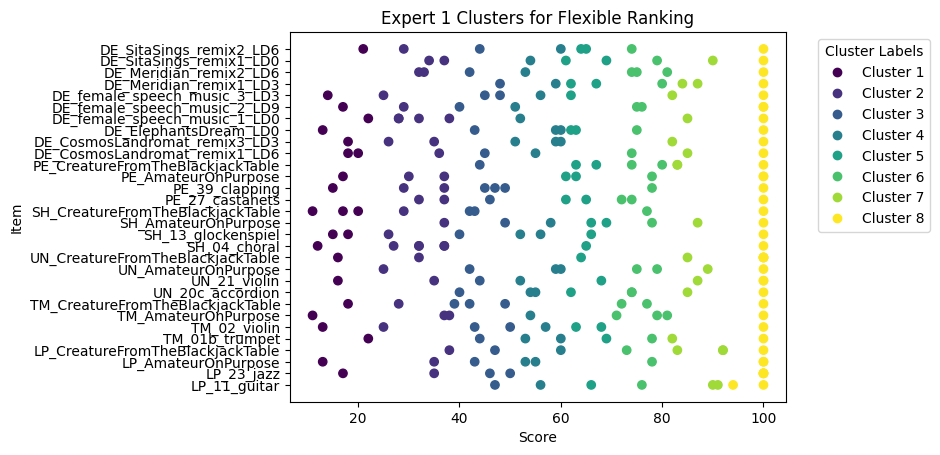

In [39]:
# Visualize the clusters

scatter = plt.scatter(expert1_scores_df['score'], 
                       expert1_scores_df['item'], 
                       c=expert1_scores_df['cluster'])

# Labels and title
plt.xlabel('Score')
plt.ylabel('Item')
plt.title('Expert 1 Clusters for Flexible Ranking')

# Create legend and move it outside
legend = plt.legend(handles=scatter.legend_elements()[0], 
                    labels=[f'Cluster {i+1}' for i in range(8)], 
                    title='Cluster Labels',
                    bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside

# Adjust layout to prevent cutting off the legend
plt.tight_layout(rect=[1, 0, 0.8, 1])

plt.show()

/var/folders/d3/99lvl9fd1673ngz9966pvq100000gn/T/ipykernel_23097/2004724561.py:19: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



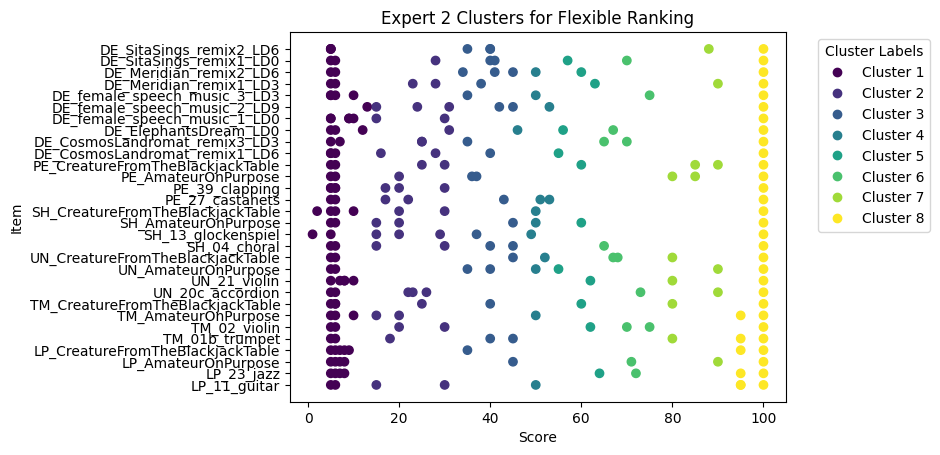

In [40]:
# Visualize the clusters

scatter = plt.scatter(expert2_scores_df['score'], 
                       expert2_scores_df['item'], 
                       c=expert2_scores_df['cluster'])

# Labels and title
plt.xlabel('Score')
plt.ylabel('Item')
plt.title('Expert 2 Clusters for Flexible Ranking')

# Create legend and move it outside
legend = plt.legend(handles=scatter.legend_elements()[0], 
                    labels=[f'Cluster {i+1}' for i in range(8)], 
                    title='Cluster Labels',
                    bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside

# Adjust layout to prevent cutting off the legend
plt.tight_layout(rect=[1, 0, 0.8, 1])

plt.show()

/var/folders/d3/99lvl9fd1673ngz9966pvq100000gn/T/ipykernel_23097/3981426970.py:19: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



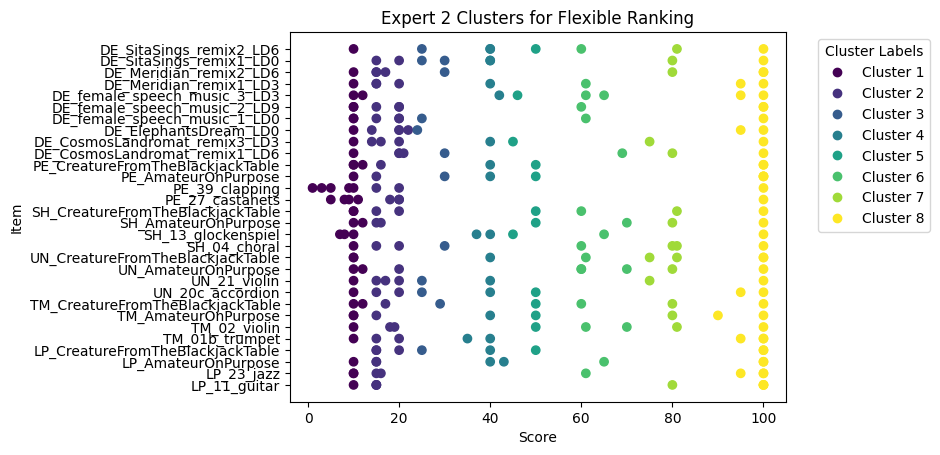

In [41]:
# Visualize the clusters

scatter = plt.scatter(expert3_scores_df['score'], 
                       expert3_scores_df['item'], 
                       c=expert3_scores_df['cluster'])

# Labels and title
plt.xlabel('Score')
plt.ylabel('Item')
plt.title('Expert 2 Clusters for Flexible Ranking')

# Create legend and move it outside
legend = plt.legend(handles=scatter.legend_elements()[0], 
                    labels=[f'Cluster {i+1}' for i in range(8)], 
                    title='Cluster Labels',
                    bbox_to_anchor=(1.05, 1), loc='upper left')  # Moves legend outside

# Adjust layout to prevent cutting off the legend
plt.tight_layout(rect=[1, 0, 0.8, 1])

plt.show()

In [42]:
import plotly.graph_objects as go
import pandas as pd

# Define distinct colors for the 8 clusters
cluster_colors = [
    "#636EFA", "#EF553B", "#00CC96", "#AB63FA", "#FFA15A", 
    "#19D3F3", "#FF6692", "#B6E880"
]

# Get the full list of unique items across all experts (ensures all items are displayed)
all_items = set()
for i in range(1, 27):
    all_items.update(globals()[f"expert{i}_scores_df"]['item'])

all_items = sorted(all_items)  # Sort for consistency
item_mapping = {item: idx for idx, item in enumerate(all_items)}  # Map items to numeric indices

# Create a figure
fig = go.Figure()

# Loop through all experts
for i in range(1, 27):
    df = globals()[f"expert{i}_scores_df"].copy()
    
    # Convert categorical items to numeric for proper visualization
    df['item_numeric'] = df['item'].map(item_mapping)

    # Create scatter traces for each cluster
    for cluster in range(1, 9):
        cluster_df = df[df['cluster'] == cluster]
        
        fig.add_trace(go.Scatter(
            x=cluster_df['score'], 
            y=cluster_df['item_numeric'],
            mode='markers',
            marker=dict(color=cluster_colors[cluster - 1], size=8),
            name=f'Cluster {cluster}',
            visible=True if i == 1 else False
        ))

# Create dropdown menu for selecting experts
dropdown_buttons = [
    dict(label=f"Expert {i}",
         method="update",
         args=[{"visible": [j // 8 == (i - 1) for j in range(26 * 8)]},
               {"title": f"Expert {i} Clusters"}]) 
    for i in range(1, 27)
]

# Update layout
fig.update_layout(
    title="Expert 1 Clusters",
    xaxis_title="Score",
    yaxis_title="Item",
    yaxis=dict(
        tickmode="array",
        tickvals=list(item_mapping.values()),
        ticktext=list(item_mapping.keys())
    ),
    updatemenus=[dict(
        buttons=dropdown_buttons,
        direction="down",
        showactive=True,
        x=0.17,
        xanchor="left",
        y=1.15,
        yanchor="top"
    )],
    height=800,
    showlegend=True
)

fig.show()


In [43]:
# print how many items are in each cluster for each expert

for i in range(1, 2):
    df = globals()[f"expert{i}_scores_df"]
    cluster_counts = df.groupby('cluster')['item'].count()
    print(f"Expert {i} Cluster Counts:")
    print(cluster_counts)
    print("Total Items (should be 240):")
    print(sum(cluster_counts))
    print()

Expert 1 Cluster Counts:
cluster
1    24
2    38
3    31
4    29
5    26
6    31
7    20
8    41
Name: item, dtype: int64
Total Items (should be 240):
240



In [44]:
for i in range(1, 27):
    df = globals()[f"expert{i}_scores_df"]
    
    # Group by 'item' and aggregate the lists back
    df = df.groupby('item').agg({
        'score': list,
        'condition': list,
        'cluster': list
    }).reset_index()

    # Rename 'cluster' to 'rankings'
    df = df.rename(columns={'cluster': 'rankings'})
    
    # Store the updated DataFrame back
    globals()[f"expert{i}_scores_df"] = df


In [45]:
expert1_scores_df

,item,score,condition,rankings
0,DE_CosmosLandromat_remix1_LD6,"[20.0, 36.0, 18.0, 45.0, 55.0, 74.0, 100.0, 85.0]","[LP3.5, LP7, Q1, Q2, Q3, Q4, Q5, Ref]","[1, 2, 1, 3, 4, 6, 8, 7]"
1,DE_CosmosLandromat_remix3_LD3,"[26.0, 51.0, 18.0, 35.0, 59.0, 60.0, 82.0, 100.0]","[LP3.5, LP7, Q1, Q2, Q3, Q4, Q5, Ref]","[2, 4, 1, 2, 4, 4, 7, 8]"
2,DE_ElephantsDream_LD0,"[13.0, 63.0, 43.0, 62.0, 59.0, 60.0, 75.0, 100.0]","[LP3.5, LP7, Q1, Q2, Q3, Q4, Q5, Ref]","[1, 5, 3, 5, 4, 4, 6, 8]"
3,DE_Meridian_remix1_LD3,"[59.0, 84.0, 48.0, 62.0, 67.0, 80.0, 87.0, 100.0]","[LP3.5, LP7, Q1, Q2, Q3, Q4, Q5, Ref]","[4, 7, 3, 5, 5, 6, 7, 8]"
4,DE_Meridian_remix2_LD6,"[32.0, 81.0, 33.0, 42.0, 53.0, 74.0, 75.0, 100.0]","[LP3.5, LP7, Q1, Q2, Q3, Q4, Q5, Ref]","[2, 6, 2, 3, 4, 6, 6, 8]"
5,DE_SitaSings_remix1_LD0,"[34.0, 54.0, 37.0, 61.0, 69.0, 79.0, 90.0, 100.0]","[LP3.5, LP7, Q1, Q2, Q3, Q4, Q5, Ref]","[2, 4, 2, 5, 5, 6, 7, 8]"
6,DE_SitaSings_remix2_LD6,"[21.0, 64.0, 29.0, 44.0, 60.0, 74.0, 65.0, 100.0]","[LP3.5, LP7, Q1, Q2, Q3, Q4, Q5, Ref]","[1, 5, 2, 3, 4, 6, 5, 8]"
7,DE_female_speech_music_1_LD0,"[22.0, 52.0, 28.0, 38.0, 28.0, 32.0, 85.0, 100.0]","[LP3.5, LP7, Q1, Q2, Q3, Q4, Q5, Ref]","[1, 4, 2, 2, 2, 2, 7, 8]"
8,DE_female_speech_music_2_LD9,"[17.0, 40.0, 29.0, 76.0, 51.0, 75.0, 100.0, 10...","[LP3.5, LP7, Q1, Q2, Q3, Q4, Q5, Ref]","[1, 3, 2, 6, 4, 6, 8, 8]"
9,DE_female_speech_music_3_LD3,"[14.0, 45.0, 25.0, 48.0, 62.0, 56.0, 82.0, 100.0]","[LP3.5, LP7, Q1, Q2, Q3, Q4, Q5, Ref]","[1, 3, 2, 3, 5, 4, 7, 8]"


In [46]:
# Extract all the 'rankings' column value for each expert and create a 30x8 matrix for each expert. Name as expert1_rankings_kmeans_based, expert2_rankings_kmeans_based, etc.

for i in range(1, 27):
    df = globals()[f"expert{i}_scores_df"]
    
    # Extract the 'cluster' values as a 30x8 matrix
    rankings_matrix = np.array(df['rankings'].tolist())  # Convert list of lists to array
    
    # Store as a variable dynamically
    globals()[f"expert{i}_rankings_kmeans_based"] = rankings_matrix

In [47]:
expert1_rankings_kmeans_based

array([[1, 2, 1, 3, 4, 6, 8, 7],
       [2, 4, 1, 2, 4, 4, 7, 8],
       [1, 5, 3, 5, 4, 4, 6, 8],
       [4, 7, 3, 5, 5, 6, 7, 8],
       [2, 6, 2, 3, 4, 6, 6, 8],
       [2, 4, 2, 5, 5, 6, 7, 8],
       [1, 5, 2, 3, 4, 6, 5, 8],
       [1, 4, 2, 2, 2, 2, 7, 8],
       [1, 3, 2, 6, 4, 6, 8, 8],
       [1, 3, 2, 3, 5, 4, 7, 8],
       [3, 5, 4, 6, 7, 8, 7, 8],
       [1, 3, 2, 3, 8, 8, 8, 8],
       [1, 3, 2, 4, 4, 8, 6, 8],
       [2, 4, 3, 6, 7, 8, 7, 7],
       [3, 6, 2, 5, 2, 5, 6, 8],
       [3, 6, 1, 2, 3, 2, 3, 8],
       [1, 2, 5, 5, 2, 6, 8, 8],
       [3, 5, 5, 6, 6, 7, 7, 8],
       [2, 5, 1, 2, 2, 2, 2, 8],
       [1, 5, 1, 2, 3, 4, 4, 8],
       [2, 4, 3, 5, 5, 6, 7, 8],
       [1, 3, 1, 1, 2, 3, 6, 8],
       [1, 4, 3, 4, 5, 6, 8, 7],
       [2, 3, 1, 3, 4, 5, 5, 8],
       [1, 2, 2, 4, 6, 6, 6, 8],
       [1, 3, 2, 3, 6, 3, 6, 8],
       [4, 6, 3, 4, 5, 6, 8, 7],
       [2, 5, 1, 3, 4, 7, 8, 8],
       [2, 3, 4, 6, 6, 7, 4, 8],
       [1, 2, 5, 7, 8, 8, 8, 8]])

In [48]:
# # Function to compute rankings with penalty for ties
# def competition_ranking(scores):
#     """Returns competition-style rankings (ascending order), where ties get the same rank, and the next rank is skipped accordingly."""
    
#     sorted_indices = np.argsort(scores)  # Sort in ascending order
#     ranks = np.zeros_like(scores, dtype=int)
    
#     rank = 1  # Start ranking from 1
#     for i in range(len(scores)):
#         if i > 0 and scores[sorted_indices[i]] == scores[sorted_indices[i - 1]]:
#             ranks[sorted_indices[i]] = ranks[sorted_indices[i - 1]]  # Assign the same rank for ties
#         else:
#             ranks[sorted_indices[i]] = rank  # Assign new rank
        
#         rank += 1  # Increment rank, ensuring skipped positions for ties
    
#     return ranks


In [49]:
# # Compute rankings systematically for 26 experts
# for i in range(1, 27):  # Assuming 26 experts
#     expert_scores = globals()[f"expert{i}_scores"]  # Get the score list
#     globals()[f"expert{i}_rankings"] = np.array([competition_ranking(row) for row in expert_scores])

In [50]:
# Perfect ranking
perfect_ranking = np.array([1, 2, 3, 4, 5, 6, 7, 8])

In [51]:
# Define a distance function (Euclidean distance)
def compute_distance(vec1, vec2):
    return np.linalg.norm(vec1 - vec2)  # Euclidean distance

<!-- For $\mathbf{v}_1 = [v_{1,1}, v_{1,2}, \ldots, v_{1,n}]$ and $\mathbf{v}_2 = [v_{2,1}, v_{2,2}, \ldots, v_{2,n}]$, with $n=8$, we compute the euclidean distance between them as follows:
$$d(\mathbf{v}_1, \mathbf{v}_2) = \sqrt{\sum_{i=1}^{n} (v_{1,i} - v_{2,i})^2}$$ -->

In [52]:
# Initialize a 26x30 matrix to store distances
distance_matrix = np.zeros((26, 30))

# Compute distances systematically
for i in range(1, 27):  # 26 experts
    expert_rankings = globals()[f"expert{i}_rankings_kmeans_based"]  # Get expert rankings (30 vectors)
    
    for j in range(30):  # 30 ranking vectors per expert
        distance_matrix[i-1, j] = compute_distance(expert_rankings[j], perfect_ranking)

distance_matrix_df = pd.DataFrame(distance_matrix, columns=items)

In [53]:
distance_matrix_df

,LP_11_guitar,LP_23_jazz,LP_AmateurOnPurpose,LP_CreatureFromTheBlackjackTable,TM_01b_trumpet,TM_02_violin,TM_AmateurOnPurpose,TM_CreatureFromTheBlackjackTable,UN_20c_accordion,UN_21_violin,...,DE_CosmosLandromat_remix1_LD6,DE_CosmosLandromat_remix3_LD3,DE_ElephantsDream_LD0,DE_female_speech_music_1_LD0,DE_female_speech_music_2_LD9,DE_female_speech_music_3_LD3,DE_Meridian_remix1_LD3,DE_Meridian_remix2_LD6,DE_SitaSings_remix1_LD0,DE_SitaSings_remix2_LD6
0,2.828427,4.242641,4.000000,5.916080,4.582576,2.645751,4.000000,5.830952,2.828427,2.645751,...,2.449490,5.744563,2.449490,3.605551,1.732051,3.741657,5.196152,4.242641,4.242641,5.196152
1,5.567764,3.316625,4.000000,4.795832,6.782330,4.795832,4.358899,8.774964,5.385165,6.244998,...,4.472136,7.071068,3.000000,3.605551,4.795832,3.741657,3.872983,5.567764,2.449490,2.828427
2,6.244998,3.000000,4.898979,5.916080,3.316625,3.872983,2.000000,6.403124,4.242641,4.795832,...,3.162278,3.162278,2.645751,3.872983,2.449490,3.000000,3.872983,4.358899,2.645751,3.464102
3,5.656854,2.236068,4.242641,4.690416,2.449490,5.385165,3.464102,4.898979,4.582576,4.123106,...,7.483315,4.690416,3.162278,3.741657,3.872983,3.316625,2.236068,6.082763,3.872983,3.741657
4,4.690416,5.099020,4.898979,3.872983,3.872983,4.898979,4.242641,4.690416,2.449490,6.928203,...,4.123106,6.480741,3.316625,4.582576,3.316625,4.898979,4.000000,5.916080,4.582576,5.830952
5,3.316625,2.645751,4.472136,2.828427,4.242641,5.477226,4.472136,5.291503,2.236068,7.348469,...,2.645751,4.000000,6.164414,5.196152,4.795832,4.472136,4.000000,1.414214,5.196152,6.480741
6,6.480741,4.000000,4.795832,6.557439,3.464102,6.633250,4.898979,5.567764,4.358899,5.656854,...,4.358899,5.196152,2.000000,5.656854,2.828427,4.472136,4.000000,4.690416,2.645751,2.828427
7,7.483315,7.416198,5.744563,5.196152,4.358899,6.000000,6.708204,7.745967,4.795832,6.244998,...,5.099020,4.582576,4.795832,7.615773,5.196152,5.656854,4.000000,5.916080,5.291503,4.000000
8,5.656854,4.123106,4.795832,5.385165,6.928203,3.316625,3.741657,5.567764,3.000000,3.000000,...,4.898979,5.196152,5.196152,5.477226,4.358899,4.898979,6.480741,6.244998,4.472136,5.385165
9,3.000000,3.872983,3.605551,3.872983,4.123106,3.000000,4.582576,2.236068,2.449490,1.000000,...,2.828427,4.123106,2.236068,2.236068,2.000000,2.236068,3.316625,2.236068,5.000000,6.244998


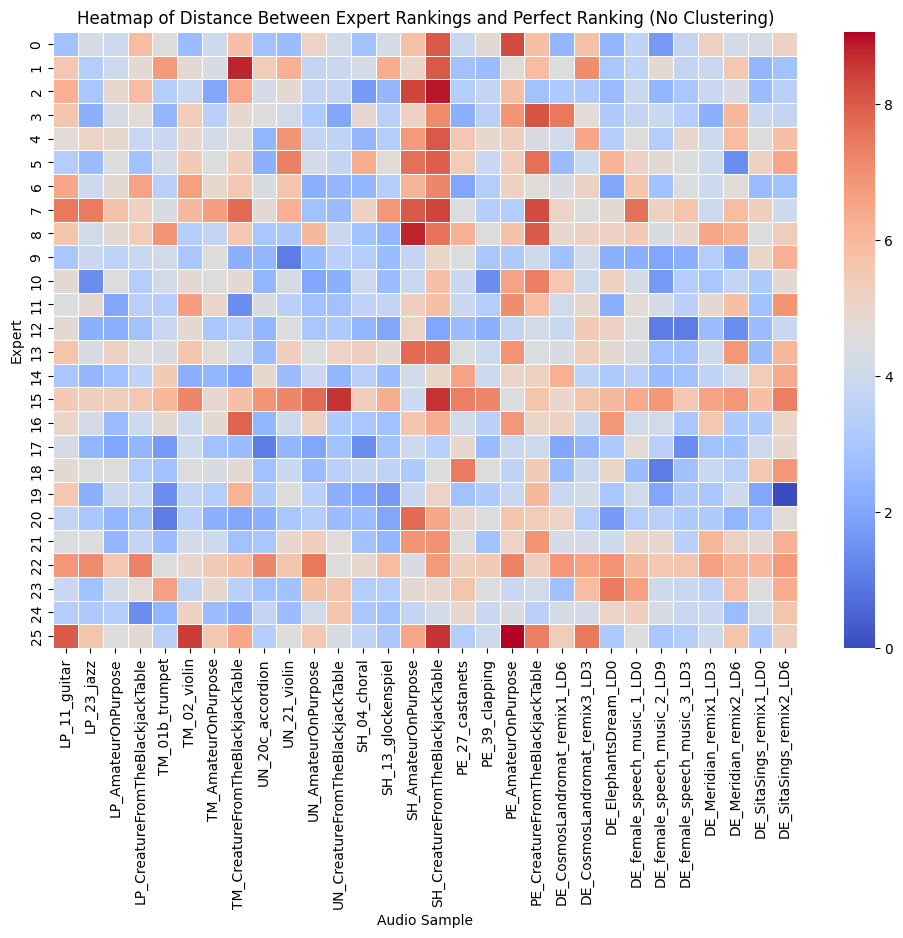

In [54]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(distance_matrix_df, cmap="coolwarm", annot=False, linewidths=0.5)

# Labels and title
plt.xlabel("Audio Sample")
plt.ylabel("Expert")
plt.title("Heatmap of Distance Between Expert Rankings and Perfect Ranking (No Clustering)")


plt.show()

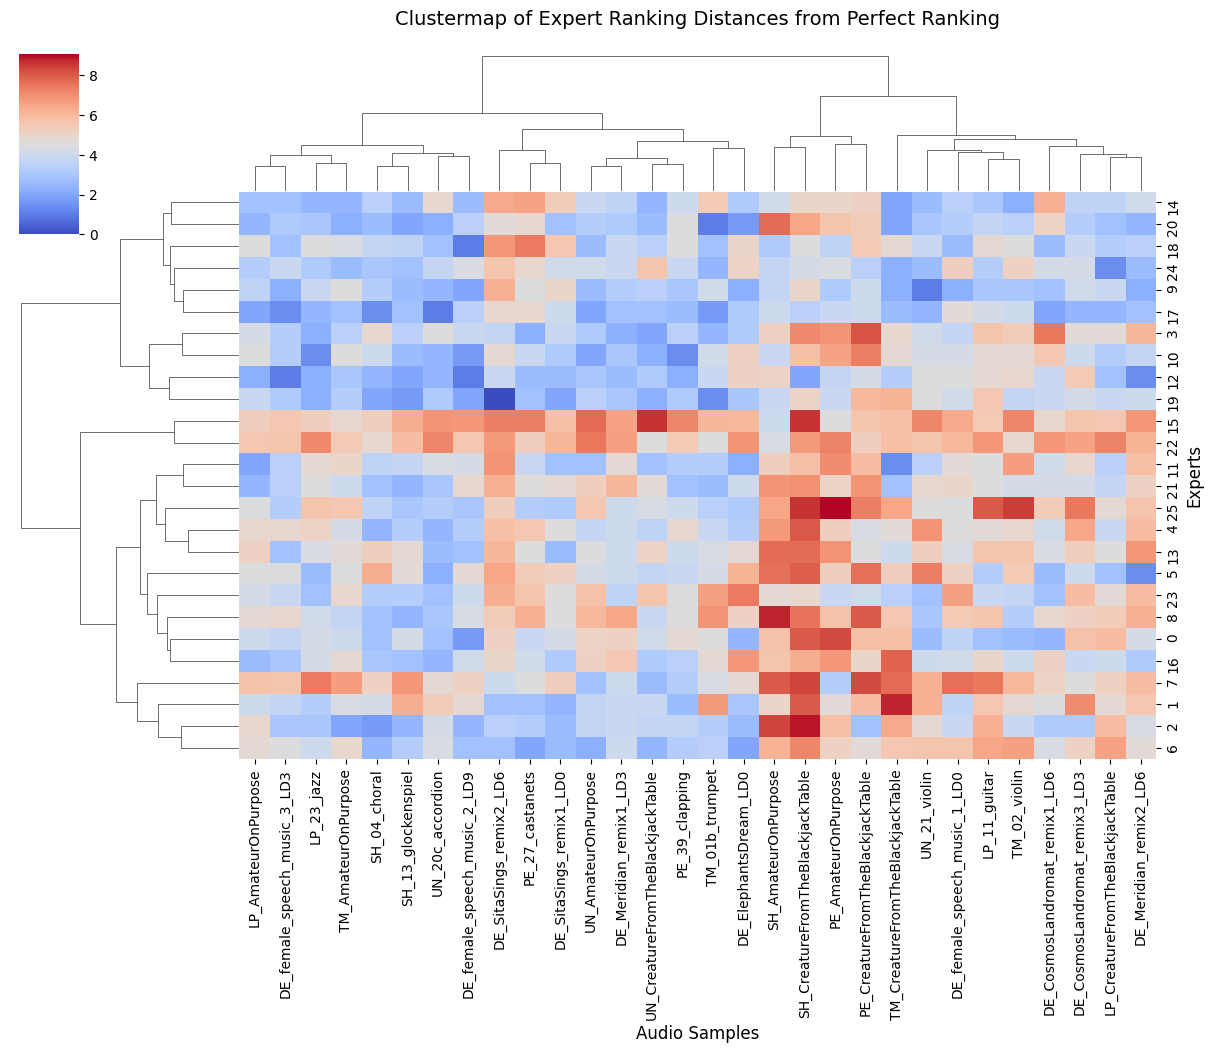

In [55]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Perform hierarchical clustering (using Ward's method)
linkage_matrix = linkage(distance_matrix, method='ward')

# Create a clustermap (heatmap with hierarchical clustering)
clustermap = sns.clustermap(
    distance_matrix_df,
    cmap="coolwarm",
    method="ward",
    figsize=(12, 10),
    xticklabels=True,  # Display column labels (optional)
    yticklabels=True   # Display row labels (optional)
)

# Add axis labels
clustermap.ax_heatmap.set_xlabel("Audio Samples", fontsize=12)
clustermap.ax_heatmap.set_ylabel("Experts", fontsize=12)
clustermap.ax_heatmap.set_title("Clustermap of Expert Ranking Distances from Perfect Ranking", fontsize=14, pad=120)


plt.show()

In [56]:
# PERFORMANCE-BASED CLUSTERING

from scipy.cluster.hierarchy import fcluster

# Extract clusters from the linkage matrix
num_clusters = 5  # Choose the number of clusters (you can adjust)
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Create a DataFrame mapping experts to their cluster
cluster_df = pd.DataFrame({'Expert': [f"Expert {i}" for i in range(1, 27)], 
                           'Cluster': cluster_labels})

cluster_df

,Expert,Cluster
0,Expert 1,4
1,Expert 2,5
2,Expert 3,5
3,Expert 4,2
4,Expert 5,4
5,Expert 6,4
6,Expert 7,5
7,Expert 8,5
8,Expert 9,4
9,Expert 10,1


In [57]:
# order cluster_df by Cluster

cluster_df_ordered = cluster_df.sort_values(by='Cluster')

cluster_df_ordered

,Expert,Cluster
20,Expert 21,1
18,Expert 19,1
17,Expert 18,1
9,Expert 10,1
24,Expert 25,1
14,Expert 15,1
12,Expert 13,2
3,Expert 4,2
19,Expert 20,2
10,Expert 11,2


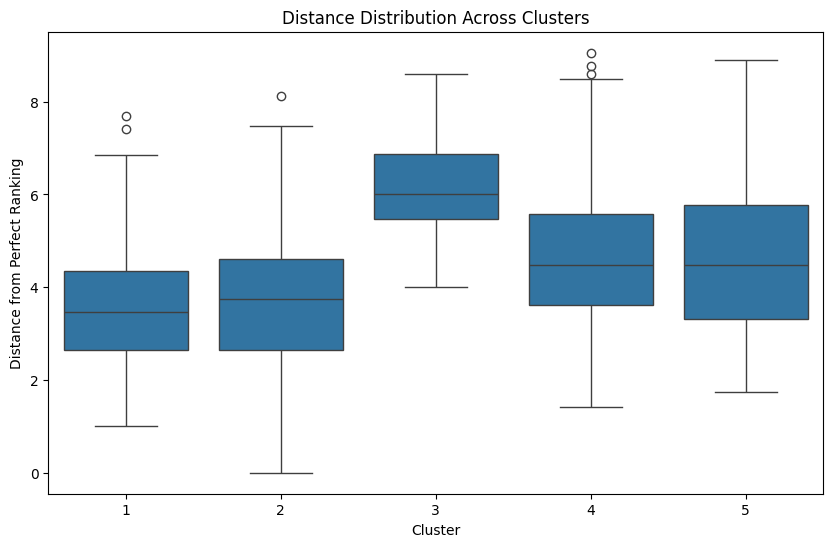

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add cluster labels to the distance matrix
distance_matrix_df['Cluster'] = cluster_labels

# Melt data for visualization
melted_df = distance_matrix_df.melt(id_vars=['Cluster'], var_name='Ranking Vector', value_name='Distance')

# Plot the distribution of distances per cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Distance', data=melted_df)
plt.xlabel("Cluster")
plt.ylabel("Distance from Perfect Ranking")
plt.title("Distance Distribution Across Clusters")
plt.show()

In [59]:
# Example: Find which experts belong to Cluster 1
cluster_1_experts = cluster_df[cluster_df['Cluster'] == 1]
print(cluster_1_experts)


       Expert  Cluster
9   Expert 10        1
14  Expert 15        1
17  Expert 18        1
18  Expert 19        1
20  Expert 21        1
24  Expert 25        1
